1.Plot the waveform for one sample data from each activity class. Are you able to see any difference/similarities between the activities? You can plot a subplot having 6 columns to show differences/similarities between the activities. Do you think the model will be able to classify the activities based on the data?

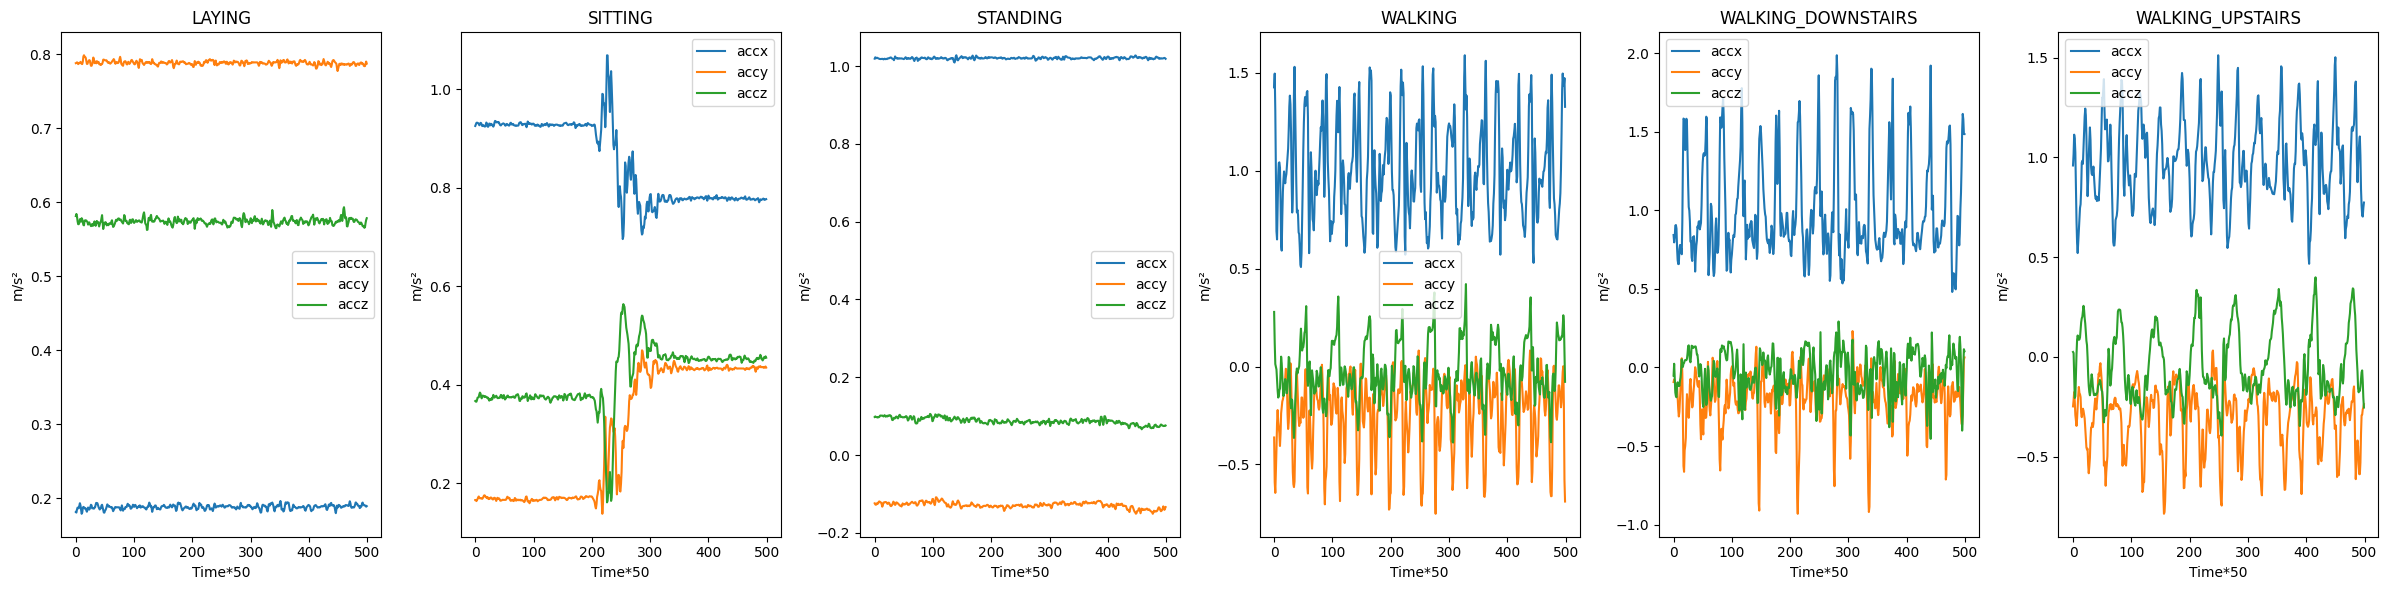

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy

LAYING= pd.read_csv("/content/drive/MyDrive/Combined/Train/LAYING/Subject_1.csv")
WALKING= pd.read_csv("/content/drive/MyDrive/Combined/Train/WALKING/Subject_1.csv")
SITTING= pd.read_csv("/content/drive/MyDrive/Combined/Train/SITTING/Subject_1.csv")
STANDING= pd.read_csv("/content/drive/MyDrive/Combined/Train/STANDING/Subject_1.csv")
WALKING_UPSTAIRS= pd.read_csv("/content/drive/MyDrive/Combined/Train/WALKING_UPSTAIRS/Subject_1.csv")
WALKING_DOWNSTAIRS= pd.read_csv("/content/drive/MyDrive/Combined/Train/WALKING_DOWNSTAIRS/Subject_1.csv")

def waveform(Activity, s, ax):
    accx = Activity['accx'][:500]
    accy = Activity['accy'][:500]
    accz = Activity['accz'][:500]
    ax.plot(accx, label="accx")
    ax.plot(accy, label="accy")
    ax.plot(accz, label="accz")
    ax.set_title(s)
    ax.set_xlabel("Time*50")
    ax.set_ylabel("m/s²")
    ax.legend()

fig, axs = plt.subplots(1, 6, figsize=(24, 6))

waveform(LAYING, "LAYING", axs[0])
waveform(SITTING, "SITTING", axs[1])
waveform(STANDING, "STANDING", axs[2])
waveform(WALKING, "WALKING", axs[3])
waveform(WALKING_DOWNSTAIRS, "WALKING_DOWNSTAIRS", axs[4])
waveform(WALKING_UPSTAIRS, "WALKING_UPSTAIRS", axs[5])

plt.tight_layout()
plt.show()

Yes, the model will be able to classify the activities because the accelerometer signals for different activities show clear patterns. Dynamic activities such as walking or running produce oscillatory, high-variance waveforms, while static activities like sitting, standing, or lying down appear much flatter with low variation. These differences in movement intensity and periodicity provide enough distinctive information for a model to separate the classes, although very similar activities (like sitting and standing) may be slightly harder to distinguish.


2.Do you think we need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs)? Look at the linear acceleration
(
acc
x^
2
+
acc
y^
2
+
acc
z^
2
)
 for each activity and justify your answer.

Mean magnitude: 0.9913194809798455
Variance of magnitude: 0.005163306243907576


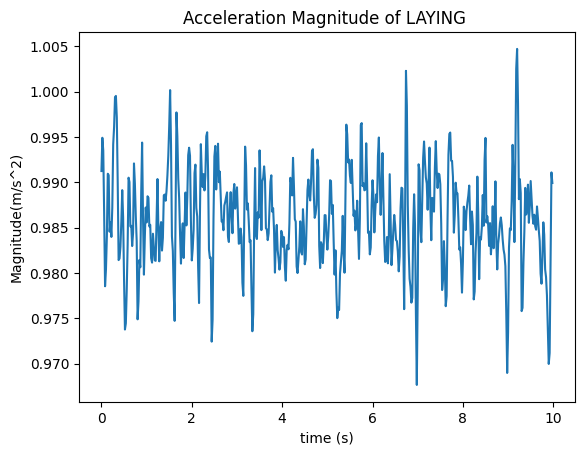

Mean magnitude: 1.1799712047185498
Variance of magnitude: 0.3088870800588194


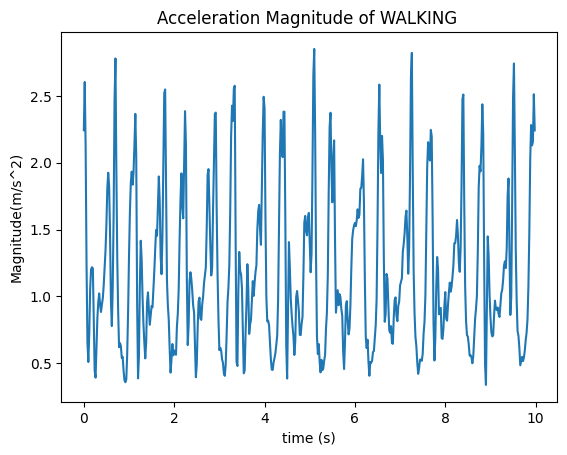

Mean magnitude: 1.0259608778425064
Variance of magnitude: 0.0004175327173247714


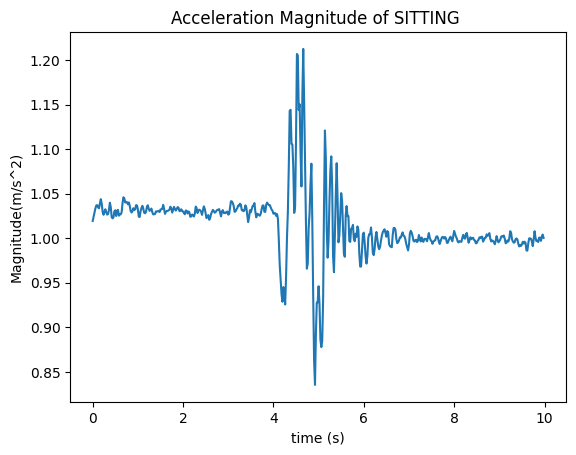

Mean magnitude: 1.0794014017051037
Variance of magnitude: 0.0001013206830863999


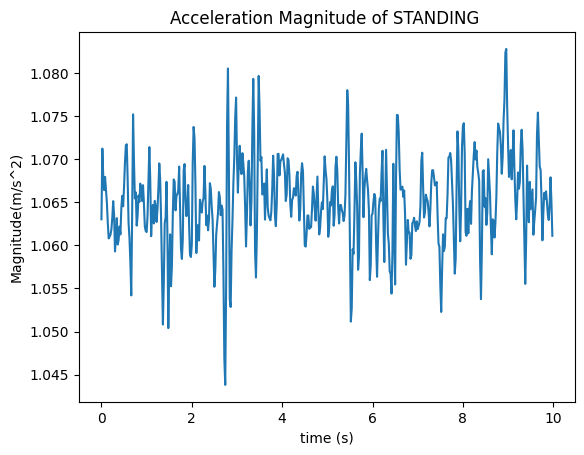

Mean magnitude: 1.220430285786515
Variance of magnitude: 0.7035892592216606


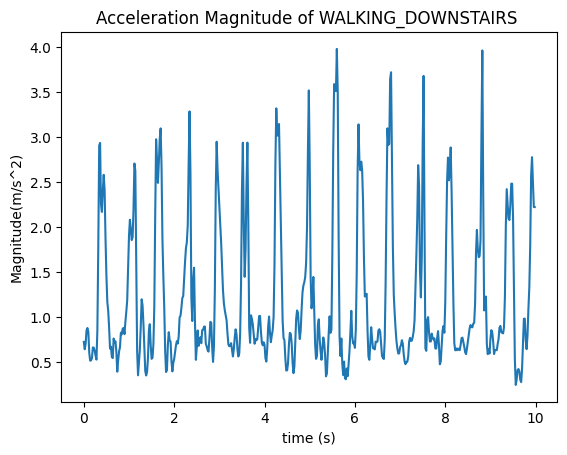

Mean magnitude: 1.15714275942826
Variance of magnitude: 0.25583857329110093


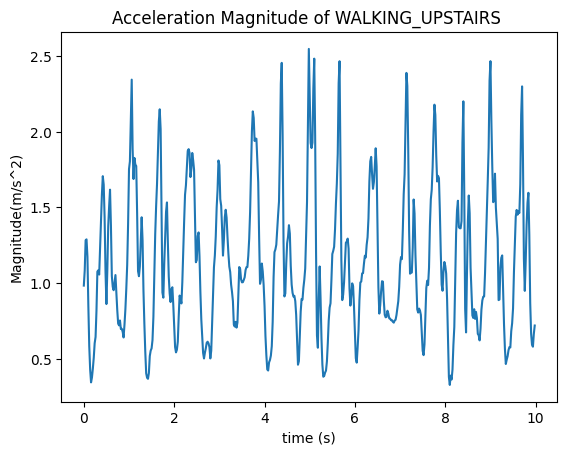

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

LAYING= pd.read_csv("/content/drive/MyDrive/Combined/Train/LAYING/Subject_1.csv")
WALKING= pd.read_csv("/content/drive/MyDrive/Combined/Train/WALKING/Subject_1.csv")
SITTING= pd.read_csv("/content/drive/MyDrive/Combined/Train/SITTING/Subject_1.csv")
STANDING= pd.read_csv("/content/drive/MyDrive/Combined/Train/STANDING/Subject_1.csv")
WALKING_UPSTAIRS= pd.read_csv("/content/drive/MyDrive/Combined/Train/WALKING_UPSTAIRS/Subject_1.csv")
WALKING_DOWNSTAIRS= pd.read_csv("/content/drive/MyDrive/Combined/Train/WALKING_DOWNSTAIRS/Subject_1.csv")
activities = [
    ("LAYING", LAYING),
    ("WALKING", WALKING),
    ("SITTING", SITTING),
    ("STANDING", STANDING),
    ("WALKING_DOWNSTAIRS", WALKING_DOWNSTAIRS),
    ("WALKING_UPSTAIRS", WALKING_UPSTAIRS)
]
for name,df in activities:
  df["acc_mag"] = df["accx"]**2 + df["accy"]**2 + df["accz"]**2

  mean_mag = df["acc_mag"].mean()
  var_mag = df["acc_mag"].var()

  print("Mean magnitude:", mean_mag)
  print("Variance of magnitude:", var_mag)
  time = np.arange(500) / 50.0

  plt.plot(time,df["acc_mag"].values[:500])  # first 10 seconds
  plt.title(f"Acceleration Magnitude of {name} ")
  plt.xlabel("time (s)")
  plt.ylabel("Magnitude(m/s^2)")
  plt.show()


Based on the observation of acceleration magnitude, static activities (laying, sitting, standing) consistently show very low variance, while dynamic activities (walking, walking upstairs, walking downstairs) show significantly higher variance. This clear separation indicates that a machine learning model is not required to distinguish between static and dynamic activities; a simple threshold on variance is sufficient.

3.Visualize the data using PCA. [1 marks]
Use PCA (Principal Component Analysis) on Total Acceleration
(
acc
x^
2
+
acc
y^
2
+
acc
z^
2
)
 to compress the acceleration timeseries into two features and plot a scatter plot to visualize different class of activities.
Next, use TSFEL (a featurizer library) to create features (your choice which ones you feel are useful) and then perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.
Now use the features provided by the dataset and perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.
Compare the results of PCA on Total Acceleration, TSFEL and the dataset features. Which method do you think is better for visualizing the data?

In [4]:
pip install tsfel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.4/63.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.5 MB/s eta 0:00:00


Number of samples loaded: 126
Each sample length: 500


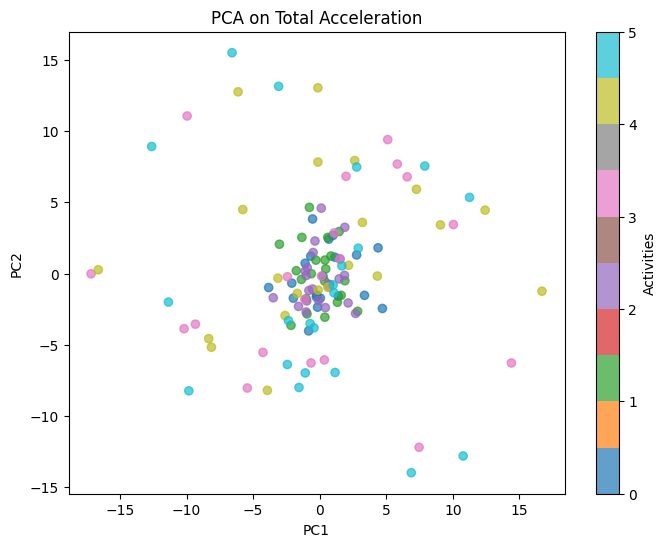

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import tsfel

# -----------------------------
# 1. Define Activity Folders
# -----------------------------
activity_dirs = {
    'LAYING': "/content/drive/MyDrive/Combined/Train/LAYING",
    'SITTING': "/content/drive/MyDrive/Combined/Train/SITTING",
    'STANDING': "/content/drive/MyDrive/Combined/Train/STANDING",
    'WALKING': "/content/drive/MyDrive/Combined/Train/WALKING",
    'WALKING_DOWNSTAIRS': "/content/drive/MyDrive/Combined/Train/WALKING_DOWNSTAIRS",
    'WALKING_UPSTAIRS': "/content/drive/MyDrive/Combined/Train/WALKING_UPSTAIRS"
}

samples = []
labels = []

# -----------------------------
# 2. Load Data & Preprocess
# -----------------------------
for activity, folder in activity_dirs.items():
    for file_name in os.listdir(folder):
        if not file_name.endswith(".csv"):
            continue

        file_path = os.path.join(folder, file_name)
        data = pd.read_csv(file_path)

        # Take 500 samples (10 sec @ 50Hz)
        acc_x = data['accx'].values[:500]
        acc_y = data['accy'].values[:500]
        acc_z = data['accz'].values[:500]

        # Total acceleration (normalized)
        total_acc = np.sqrt(acc_x**2 + acc_y**2 + acc_z**2)
        total_acc = (total_acc - total_acc.mean()) / total_acc.std()

        samples.append(total_acc)
        labels.append(activity)

samples = np.array(samples)
labels = np.array(labels)

print("Number of samples loaded:", samples.shape[0])
print("Each sample length:", samples.shape[1])

# -----------------------------
# 3. PCA on Total Acceleration
# -----------------------------
flattened = samples.reshape(len(samples), -1)
pca1 = PCA(n_components=2)
pca_result1 = pca1.fit_transform(flattened)

plt.figure(figsize=(8,6))
scatter = plt.scatter(pca_result1[:, 0], pca_result1[:, 1],
                      c=[list(activity_dirs.keys()).index(l) for l in labels],
                      cmap='tab10', alpha=0.7)
plt.colorbar(scatter, ticks=range(len(activity_dirs)), label="Activities")
plt.title("PCA on Total Acceleration")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()



/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-3833557832.py:24: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, df)


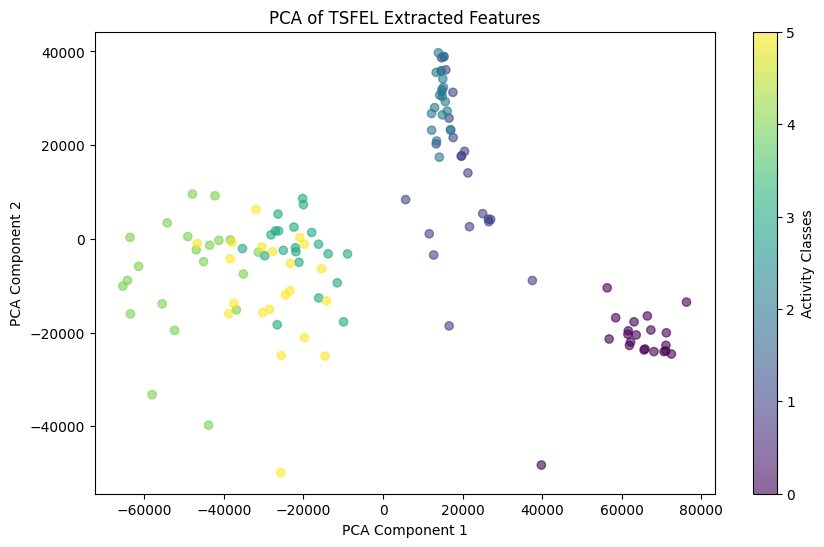

In [12]:
features_list = []
labels = []

for activity, activity_dir in activity_dirs.items():

    file_names = os.listdir(activity_dir)

    for file_name in file_names:
        file_path = os.path.join(activity_dir, file_name)

        data = pd.read_csv(file_path)

        acc_x = data['accx'].values[:500]
        acc_y = data['accy'].values[:500]
        acc_z = data['accz'].values[:500]
        df = pd.DataFrame({
            'acc_x': acc_x,
            'acc_y': acc_y,
            'acc_z': acc_z
        })

        cfg = tsfel.get_features_by_domain()

        features = tsfel.time_series_features_extractor(cfg, df)


        features_list.append(features.values.flatten())
        labels.append(activity)


features_array = np.array(features_list)
labels = np.array(labels)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_array)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=[['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'].index(activity) for activity in labels], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Activity Classes')
plt.title('PCA of TSFEL Extracted Features')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

/tmp/ipython-input-2904652776.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv(X_train_path, delim_whitespace=True, header=None)
/tmp/ipython-input-2904652776.py:22: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv(y_train_path, delim_whitespace=True, header=None, names=['Activity'])


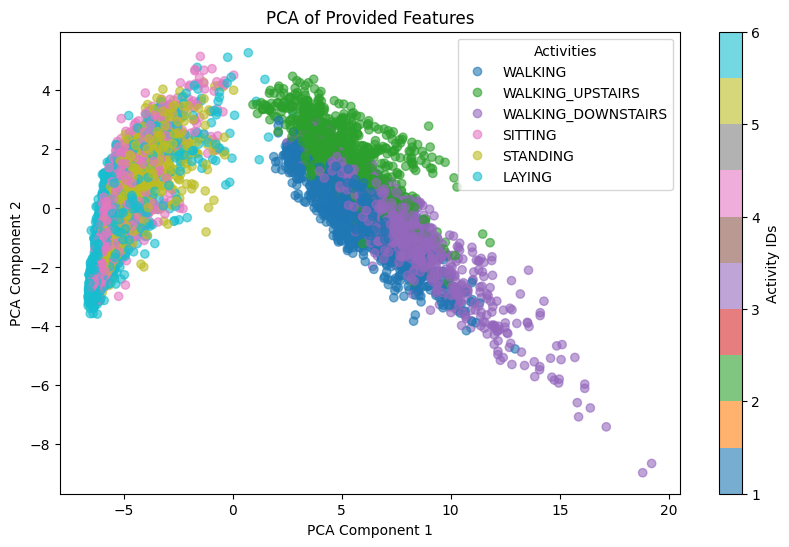

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# -----------------------------
# 1. Load feature names
# -----------------------------
features_path = "/content/drive/MyDrive/UCI HAR Dataset/features.txt"

with open(features_path, 'r') as f:
    feature_names = [line.strip().split()[1] for line in f.readlines()]

# -----------------------------
# 2. Load train data
# -----------------------------
X_train_path = "/content/drive/MyDrive/UCI HAR Dataset/train/X_train.txt"
y_train_path = "/content/drive/MyDrive/UCI HAR Dataset/train/y_train.txt"

X_train = pd.read_csv(X_train_path, delim_whitespace=True, header=None)
X_train.columns = feature_names

y_train = pd.read_csv(y_train_path, delim_whitespace=True, header=None, names=['Activity'])

# -----------------------------
# 3. Activity label mapping
# -----------------------------
activity_labels = {
    1: "WALKING",
    2: "WALKING_UPSTAIRS",
    3: "WALKING_DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
}
y_train['ActivityName'] = y_train['Activity'].map(activity_labels)

# -----------------------------
# 4. PCA
# -----------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# -----------------------------
# 5. Visualization
# -----------------------------
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=y_train['Activity'],
    cmap='tab10',
    alpha=0.6
)

# Create legend with activity names
handles, _ = scatter.legend_elements()
plt.legend(handles, activity_labels.values(), title="Activities")

plt.colorbar(scatter, label='Activity IDs')
plt.title('PCA of Provided Features')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


Features provided by the dataset are more informative as it shows clearer patterns and clusters. The features provided by the dataset capture specific aspects of the activities being analyzed that is more relevant to distinguishing between different classes of activities.

4.Calculate the correlation matrix of the features obtained by TSFEL and provided in the dataset. Identify the features that are highly correlated with each other. Are there any redundant features?

In [17]:
with open(features_path, 'r') as f:
    uci_feature_names = [line.strip().split()[1] for line in f.readlines()]

X_train = pd.read_csv(X_train_path, sep=r'\s+', header=None)
X_train.columns = uci_feature_names
n=len(tsfel_feature_names)

X_train_subset = X_train.iloc[:features_tsfel.shape[0], :]

combined_features = np.hstack((features_tsfel, X_train_subset.values))

combined_feature_names = tsfel_feature_names + [f"UCI_{name}" for name in uci_feature_names[:X_train_subset.shape[1]]]

combined_df = pd.DataFrame(combined_features, columns=combined_feature_names)

def standardize(df):
    return (df - df.mean()) / df.std()

standardized_df = standardize(combined_df)

C = standardized_df.values
cov_matrix = C.T.dot(C) / (C.shape[0] - 1)
cov_matrix_df = pd.DataFrame(cov_matrix, index=combined_feature_names, columns=combined_feature_names)

threshold = 0.87
high_corr_pairs = [(i, j, cov_matrix_df.iat[i, j])
                   for i in range(n)
                   for j in range(n, cov_matrix_df.shape[1])
                   if abs(cov_matrix_df.iat[i, j]) > threshold]

print("Highly correlated pairs of features:")
for pair in high_corr_pairs:
    print(f"Feature {combined_feature_names[pair[0]]} and Feature {combined_feature_names[pair[1]]} with correlation {pair[2]:.2f}")


Highly correlated pairs of features:
Feature acc_x_Peak to peak distance and Feature UCI_tBodyAcc-std()-X with correlation 0.87
Feature acc_x_Peak to peak distance and Feature UCI_tBodyAccJerk-std()-Z with correlation 0.87
Feature acc_x_Peak to peak distance and Feature UCI_tBodyAccJerk-entropy()-X with correlation 0.88
Feature acc_x_Peak to peak distance and Feature UCI_tBodyAccJerk-entropy()-Y with correlation 0.88
Feature acc_x_Peak to peak distance and Feature UCI_tBodyAccJerk-entropy()-Z with correlation 0.87
Feature acc_x_Peak to peak distance and Feature UCI_tBodyGyroJerk-entropy()-Y with correlation 0.88
Feature acc_x_Peak to peak distance and Feature UCI_tBodyAccJerkMag-std() with correlation 0.87
Feature acc_x_Peak to peak distance and Feature UCI_tBodyAccJerkMag-mad() with correlation 0.87
Feature acc_x_Peak to peak distance and Feature UCI_fBodyAcc-sma() with correlation 0.87
Feature acc_x_Peak to peak distance and Feature UCI_fBodyAccJerk-mean()-Z with correlation 0.87
Fea

Yes, there are many redundant features. Since a higher correlation between features indicates redundancy, the large number of highly correlated pairs we found shows that several features in our dataset are redundant.